In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Load and preprocess and shuffle the dataframe

In [2]:
df = pd.read_csv('final.csv')

df['key'] = df['key'].astype('category')

df['mode'] = df['mode'].astype('category')


Shuffle data

In [3]:
df = df.sample(frac=1, random_state=42)


Extract song name

In [4]:
song_names = df['name']


Remove extra columns (by keeping the ones we need)

In [5]:

df = df[['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo', 'preference']]



Remove duplicates

In [6]:
df = df.drop_duplicates()


Split into feature and target variable, although for this analysis we will not use our target variable.

In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values


Define a scaling function

In [8]:
def scale_features(X):
    for i in range(X.shape[1]):
        col = X[:, i]
        if np.issubdtype(col.dtype, np.number):  # check if the column is numeric
            col = col.astype(float)
            X[:, i] = (col - col.mean()) / col.std()  # scale the column


Apply scaling function

In [9]:
scale_features(X)


Define the number of clusters we want

In [10]:
k = 2


Initizlialize the KMeans object

In [11]:
kmeans = KMeans(n_clusters=k)


Apply the function to our feature variables

In [12]:
kmeans.fit(X)


C:\Users\Khoi Trinh\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Get the cluster labels for each data point

In [13]:
labels = kmeans.labels_


Add the cluter labels to the original data, as a new column

In [14]:
df['cluster'] = labels


Let's see how many data points are in each cluster

In [15]:
print(df['cluster'].value_counts())


0    1886
1     210
Name: cluster, dtype: int64


Group the data by cluster

In [16]:
clusters = df.groupby('cluster')


Iterate over the cluters and print the details

In [17]:
for cluster, cluster_data in clusters:
    print('Cluster {}:'.format(cluster))
    print('Number of data points: {}'.format(len(cluster_data)))
    print('Mean values of features:')
    print(cluster_data.mean())
    print('\n')


Cluster 0:
Number of data points: 1886
Mean values of features:
danceability          0.443709
energy                0.910390
loudness             -4.551327
speechiness           0.101294
acousticness          0.013113
instrumentalness      0.079211
liveness              0.237486
valence               0.373674
tempo               130.309678
preference            1.000000
cluster               0.000000
dtype: float64


Cluster 1:
Number of data points: 210
Mean values of features:
danceability          0.511622
energy                0.477807
loudness             -9.817581
speechiness           0.042874
acousticness          0.403668
instrumentalness      0.165003
liveness              0.180118
valence               0.348618
tempo               115.867219
preference            1.000000
cluster               1.000000
dtype: float64




C:\Users\Khoi Trinh\AppData\Local\Temp\ipykernel_13384\2017964949.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(cluster_data.mean())


Perform PCA to project the data onto two principal components (the same thing we did in the PCA analysis)

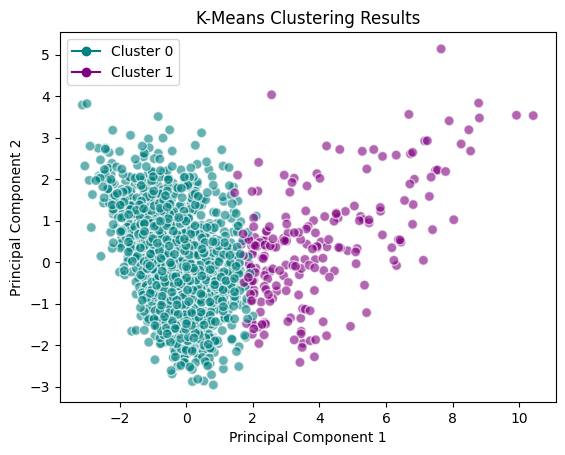

In [18]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)


# define a dictionary to map clusters to colors
colors = {0: 'teal', 1: 'purple'}

# define marker size
marker_size = 2


plt.scatter(pca_data[:,0], pca_data[:,1], c=df['cluster'].map(colors), s=50, alpha=0.6, edgecolors='w')
# add legends
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label='Cluster {}'.format(cluster))
                   for cluster, color in colors.items()]
plt.legend(handles=legend_elements)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.show()

In [19]:
# plt.savefig('kmeanscluter.png')

<Figure size 640x480 with 0 Axes>